## Statystyka matematyczna I {-}

- Praca pisemna

- Uladzislau Darhevich 108519

Niech $X_1, . . . , X_n$ będzie próbą losową prostą z rozkładu wykładniczego $Ex(θ).$

- (a) Wyznaczyć $ENW(θ)$.
- (b) Wykazać, że $ENW(θ)$ jest estymatorem obciążonym i obliczyć obciążenie.
- (c) Sprawdzić, czy $ENW(θ)$ jest estymatorem asymptotycznie nieobciążonym.
- (d) Na podstawie $ENW(θ)$ zaproponować nieobciążony estymator parametru $θ$.
- (e) Porównać ryzyka tych estymatorów.
- (f) Wygenerować 1000 prób losowych rozmiaru n = 2 z rozkładu $Ex(5.5)$. Dla każdej z nich obliczyć dwa estymatory parametru $θ$:
$$T_1 = \frac{1}{\bar{X}}$$ 
oraz
$$T_2 = \frac{n-1}{\sum_{i=1}^{n}X_i}$$

Obliczyć średnią wartość estymatora $T_1$ i $T_2$ na podstawie 1000 prób. Wyniki skomentować.

### (a) {-}

Gęstość prawdopodobieństwa:

$f(x) = \left\{ \begin{array}{cl}
\theta e^{-\theta x} & : \ x \geq 0 \\
0 & : \ x < 0
\end{array} \right.$

Wtedy

$$L(\theta, X_1, X_2, ...X_n) = \theta e^{-\theta x_1} \cdot \theta e^{-\theta x_2}\cdot ...\cdot \theta e^{-\theta x_n}$$

$$L(\theta, X_1, X_2, ...X_n) = \theta ^n\cdot exp(-\theta\sum\limits_{i=1}^{n}x_i)$$

$$\ln L(\theta, X_1, X_2, ...X_n) = n\ln\theta-\theta \sum\limits_{i=1}^{n}x_i$$

Możemy przekształcić to wyrażenie i otrzymujemy

$$\frac{d }{d\theta}\ln L(\theta, X_1, X_2, ...X_n) = 0$$

$$\frac{d }{d\theta}(n\ln\theta-\theta \sum\limits_{i=1}^{n}x_i)=\frac{n}{\theta}-\sum\limits_{i=1}^{n}x_i = 0$$

$$\theta = \frac{n}{\sum\limits_{i=1}^{n}x_i}$$

Zatem estymator jest odwrotnością średniej z próby.

$$ENW(\theta) = \frac{1}{\overline{x}}$$

### (b) {-}

$$T= \frac{n}{\sum\limits_{i=1}^{n}x_i}\Longrightarrow \mathbb{E}T=n\mathbb{E}(\frac{1}{\sum\limits_{i=1}^{n}x_i})$$

$$\sum_{i=1}^{n}x_i \sim \text{Gamma}(n, \theta)\Rightarrow \frac{1}{\sum_{i=1}^{n}x_i}\sim \text{IG}(n, \theta)$$

$$\mathbb{E}\frac{1}{\sum_{i=1}^{n}x_i} = \frac{\theta}{n-1}$$

Z tego, że $$\mathbb{E}T = n\cdot\frac{\theta}{n-1}\neq \theta$$ wychodzi, że estymator jest **obciążony**.

### (c) {-}

$$\lim_{n \to \infty }n\frac{\theta}{n-1}=g(\theta)=\theta$$

Estymator jest asymptotycznie obciążony

### (d) {-}

Nieobciążonym estymatorem dla $ENW(\theta)$ będzie taki estymator, że $$\mathbb{E}T = \theta$$

Takim estymatorem może być $$T = \frac{n-1}{\sum\limits_{i=1}^{n}x_i}$$

Sprawdźmy to! 

$$\mathbb{E}T=(n-1)\mathbb{E}(\frac{1}{\sum\limits_{i=1}^{n}x_i})=(n-1)\frac{\theta}{n-1}=\theta$$


### (e) {-}

Ryzyko dla estymatora obciążonego:

$$T_1 = \frac{n}{\sum\limits_{i=1}^{n}x_i}$$

$$\text{Var }T_1=\text{Var}{\frac{n}{\sum_{i=1}^{n}x_i}}=n^2\cdot \text{Var}{\frac{1}{\sum_{i=1}^{n}x_i}} = n^2\cdot \frac{\theta^2}{(n-1)^2(n-2)}$$

$$R_1(\theta)=n^2\frac{\theta^2}{(n-1)^2(n-2)}+\frac{\theta^2}{(n-1)^2}=\frac{\theta^2(n+2)}{(n-2)(n-1)}$$

Ryzyko dla estymatora nieobciążonego:

$$T_2 = \frac{n-1}{\sum\limits_{i=1}^{n}x_i}$$

$$\text{Var }T_2=\text{Var}{\frac{n-1}{\sum_{i=1}^{n}x_i}}=(n-1)^2\cdot \text{Var}{\frac{1}{\sum_{i=1}^{n}x_i}} = (n-1)^2\cdot \frac{\theta^2}{(n-1)^2(n-2)}=\frac{\theta^2}{n-2}$$

$$R_2(\theta)=\frac{\theta^2}{n-2}$$

Estymator $T_1$ jest lepszy niż $T_2$, bo $R_1$ > $R_2$.




### (f) {-}

In [70]:
#importy
import numpy as np
import matplotlib.pyplot as plt


#parametry
theta = 5.5
n = 5
size = 1000

#wygenerowanie prób
np.random.seed(108519)
probes = np.random.exponential(1/theta, [size, n])

#zapisywanie prób do pliku .csv
np.savetxt('probe.csv', probes, delimiter = ',')

#obliczenia
resutls = np.zeros([size, n])
for i in range(size):
    resutls[i, 0] = 1/np.mean(probes[i])
    resutls[i, 1] = (n - 1)/np.sum(probes[i])

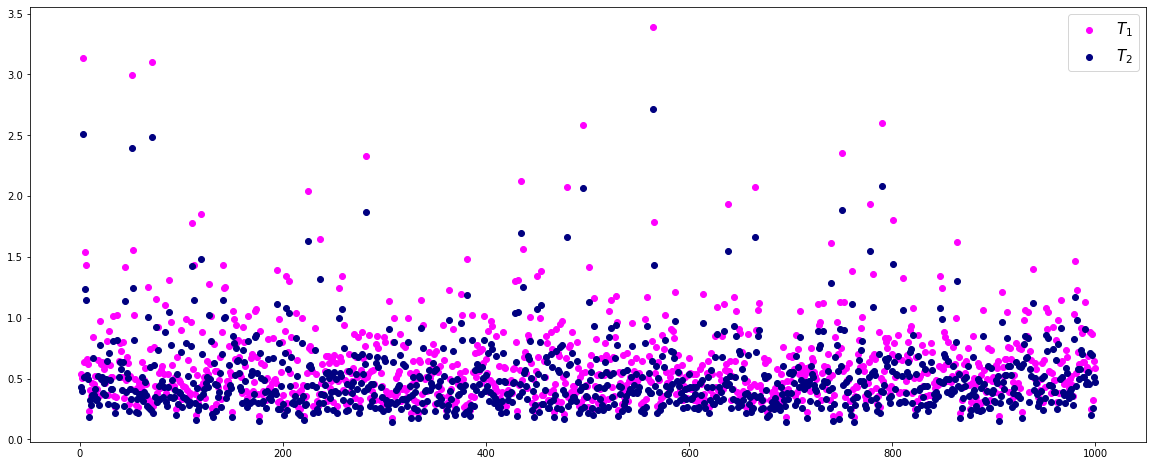

In [74]:
xs = np.linspace(1, size, size)
plt.figure(figsize=(16, 9))
plt.scatter(xs, resutls[:, 0], color='magenta', label='$T_1$')
plt.scatter(xs, resutls[:, 1], color='navy', label='$T_2$')
plt.legend(fontsize=15)
plt.show();